In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import wfdb

from gc import collect as collect_garbage
from psutil import virtual_memory
from os import scandir

In [2]:
%matplotlib widget

In [3]:
collect_garbage()
virtual_memory()

svmem(total=12655771648, available=8198057984, percent=35.2, used=4457713664, free=8198057984)

In [4]:
ecg_folder = "../../Deidentified-Raw-Waveforms/"
peak_folder = "completed_rpeaks/"

In [5]:
ecg_files = sorted([file.name for file in scandir(ecg_folder) if ".csv" in file.name])
peak_files = sorted([file.name for file in scandir(peak_folder)])

# It will be easier to use the completed, but not concatenated rpeaks for
# this task. Also, we need the ".csv" condition for ecg files because 
# there is a folder full of rpeaks in there

In [6]:
coldict = {
    "raw_waves_data_1a.csv": ["time", "257"], "raw_waves_data_1b.csv": ["time", "257", "258"], "raw_waves_data_1c.csv": ["time", "257", "258"], "raw_waves_data_1d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_1e.csv": ["time", "258"],

    "raw_waves_data_2a.csv": ["time", "257", "258"], "raw_waves_data_2b.csv": ["time", "258"], "raw_waves_data_2c.csv": ["time", "257"], "raw_waves_data_2d.csv": ["time", "257", "258"], 
    "raw_waves_data_2e.csv": ["time", "257", "258"],

    "raw_waves_data_3a.csv": ["time", "258"], "raw_waves_data_3b.csv": ["time", "258"], "raw_waves_data_3c.csv": ["time", "258"], "raw_waves_data_3d.csv": ["time", "258"], 
    "raw_waves_data_3e.csv": ["time", "257", "258", "317"],

    "raw_waves_data_4a.csv": ["time", "257", "258"], "raw_waves_data_4b.csv": ["time", "257", "258"], "raw_waves_data_4c.csv": ["time", "257"], "raw_waves_data_4d.csv": ["time", "257", "258"], 
    "raw_waves_data_4e.csv": ["time", "257", "258"],

    "raw_waves_data_5a.csv": ["time", "258"], "raw_waves_data_5b.csv": ["time", "258"], "raw_waves_data_5c.csv": ["time", "258"], "raw_waves_data_5d.csv": ["time", "258", "317"],
    "raw_waves_data_5e.csv": ["time", "258"],

    "raw_waves_data_6a.csv": ["time", "257", "258"], "raw_waves_data_6b.csv": ["time", "258"], "raw_waves_data_6c.csv": ["time", "258"], "raw_waves_data_6d.csv": ["time", "258"], "raw_waves_data_6e.csv": ["time", "258"],
    
    "raw_waves_data_7a.csv": ["time", "257", "258"], "raw_waves_data_7b.csv": ["time", "258"], "raw_waves_data_7c.csv": ["time", "258"], "raw_waves_data_7d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_7e.csv": ["time", "258"]
}

namedict = {
    "raw_waves_data_1a.csv": "1a", "raw_waves_data_1b.csv": "1b", "raw_waves_data_1c.csv": "1c", "raw_waves_data_1d.csv": "1d", "raw_waves_data_1e.csv": "1e",
    "raw_waves_data_2a.csv": "2a", "raw_waves_data_2b.csv": "2b", "raw_waves_data_2c.csv": "2c", "raw_waves_data_2d.csv": "2d", "raw_waves_data_2e.csv": "2e",
    "raw_waves_data_3a.csv": "3a", "raw_waves_data_3b.csv": "3b", "raw_waves_data_3c.csv": "3c", "raw_waves_data_3d.csv": "3d", "raw_waves_data_3e.csv": "3e",
    "raw_waves_data_4a.csv": "4a", "raw_waves_data_4b.csv": "4b", "raw_waves_data_4c.csv": "4c", "raw_waves_data_4d.csv": "4d", "raw_waves_data_4e.csv": "4e",
    "raw_waves_data_5a.csv": "5a", "raw_waves_data_5b.csv": "5b", "raw_waves_data_5c.csv": "5c", "raw_waves_data_5d.csv": "5d", "raw_waves_data_5e.csv": "5e",
    "raw_waves_data_6a.csv": "6a", "raw_waves_data_6b.csv": "6b", "raw_waves_data_6c.csv": "6c", "raw_waves_data_6d.csv": "6d", "raw_waves_data_6e.csv": "6e",
    "raw_waves_data_7a.csv": "7a", "raw_waves_data_7b.csv": "7b", "raw_waves_data_7c.csv": "7c", "raw_waves_data_7d.csv": "7d", "raw_waves_data_7e.csv": "7e"    
}

In [7]:
# We're gonna build this method for the first file, as per usual

# Load in the ECG data, construct the signal, and delete the data frame
cols = coldict[ecg_files[0]]
df = pd.read_csv(ecg_folder + ecg_files[0], usecols=cols)
print ("Data loaded in")

# Create a complete signal in which to detect R-peaks
signal = pd.Series(df[cols[1]]) # Column 0 is the time
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(0)
signal = pd.to_numeric(signal)
print("Signals combined and filled in")

# Delete the dataframe
del df
collect_garbage()
virtual_memory()


Data loaded in
Signals combined and filled in


svmem(total=12655771648, available=7645741056, percent=39.6, used=5010030592, free=7645741056)

In [57]:
# Bring in the R-peaks too
rpeaks = pd.read_csv(peak_folder + peak_files[0])

In [58]:
rpeaks

,Unnamed: 0,time
0,56,345600.265306
1,151,345600.642058
2,246,345601.010424
3,341,345601.393469
4,435,345601.779318
...,...,...
674738,65845859,604798.408304
674739,65845954,604798.793622
674740,65846049,604799.164347
674741,65846145,604799.542720


In [9]:
collect_garbage()
virtual_memory()

svmem(total=12655771648, available=7637749760, percent=39.7, used=5018021888, free=7637749760)

In [10]:
filt = (~rpeaks.isna())
for i in range(len(filt)):
    if signal[ rpeaks.loc[i, "Unnamed: 0"]] < -18 or signal[ rpeaks.loc[i, "Unnamed: 0"]] > 50:
        filt.loc[i] = False
filt = pd.Series(filt["Unnamed: 0"])

In [11]:
filtered_rpeaks = rpeaks.loc[filt]

In [12]:
# Okay, filter 1 works! Now, I want to try filter 2
filt2 = pd.Series( [False for i in range(len(rpeaks))] )

# We want filt2 to mark as False any rpeak that comes after an rpeak that was removed
# May change this to true depending on if it makes the code more readable
# Note that this code doesn't modify the first rpeak; this is okay since that can't possible come after a spike (except for file concatenation, but 5 bad peaks is no big deal)
for i in range(1, len(rpeaks)):
    if filt[i-1] == False and filt[i] == True:
        filt2[i] = True



In [13]:
toss_peaks = rpeaks.loc[filt2]

In [14]:
virtual_memory()

svmem(total=12655771648, available=7522287616, percent=40.6, used=5133484032, free=7522287616)

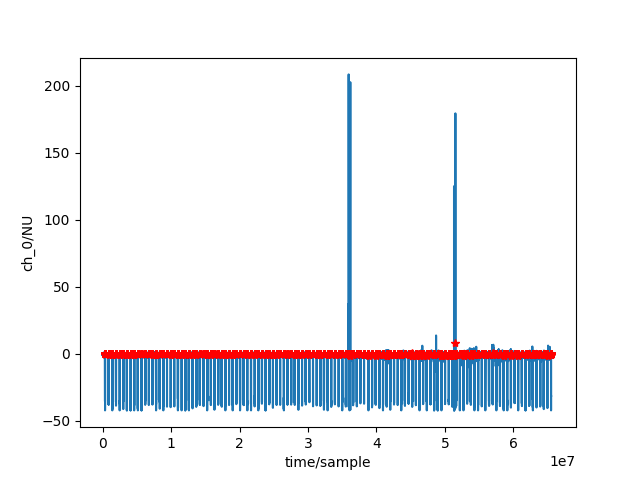

In [20]:
wfdb.plot_items(signal = np.array(signal).reshape((len(signal), 1)), ann_samp=[toss_peaks])

In [21]:
rpeaks

,Unnamed: 0
0,56
1,151
2,246
3,341
4,435
...,...
674738,65845859
674739,65845954
674740,65846049
674741,65846145


In [26]:
test_filt = pd.DataFrame(filt2)

In [27]:
test_filt

,0
0,False
1,False
2,False
3,False
4,False
...,...
674738,False
674739,False
674740,False
674741,False


In [47]:
# Okay, I need a smaller example to build on
testpeaks = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
testpeaks["1"] = [1,2,3,4,5,6,7,8,9,10]

In [48]:
testpeaks

,0,1
0,10,1
1,20,2
2,30,3
3,40,4
4,50,5
5,60,6
6,70,7
7,80,8
8,90,9
9,100,10


In [53]:
filt1 = pd.Series( [True,  True,  True,  False, True, False, True, True,  True,  True] )
filt2 = pd.Series( [False, False, False, False, True, False, True, False, False, False])
filt2 = ~filt2

In [54]:
testpeaks.loc[filt1].diff().loc[filt2]

,0,1
0,NaN,NaN
1,10.0,1.0
2,10.0,1.0
7,10.0,1.0
8,10.0,1.0
9,10.0,1.0
